# Sin Wave Test Example
This example tests the code by training on inputing and outputing the future points along a sin wave.

## Setup
Import HAPI and other packages

In [1]:
from hapiclient import hapi, hapitime2datetime
from datetime import datetime
from hapiplot import hapiplot
from hapi_nn import HAPINNTrainer, HAPINNTester, config
import hapi_nn
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
warnings.simplefilter('always')

### HAPI Setup
Set HAPI related parameters

In [3]:
config.MODEL_ENGINE = 'TORCH'

server = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset = 'dataset1'
start = '1970-01-01T00:00:00Z'
stop = '1970-01-02T00:00:00Z'

start2 = '1970-01-02T01:00:00Z'
stop2 = '1970-01-02T04:00:00Z'

parameters = 'scalar,vector'
options = {'logging': True, 'usecache': True, 'cachedir': './hapicache'}

## HAPI-NN Testing
Begin testing HAPI-NN

In [4]:
in_steps = 512
out_steps = 512

### Create Trainer and Tester as well as load data with HAPI

Create Trainer

In [5]:
splits = (.7, .2, .1)  # Train, Validation, Test
    
trainer = HAPINNTrainer(
    splits, in_steps, out_steps,
    preprocess_func=None,
    preprocess_y_func=None,
    lag=True
)

Load data for Training

Model input will come from scalar in HAPI dataset. The output comes from the vector column including all three elements.
The input is lagged behind the output, so we are forecasting the outputs based on the inputs.

In [6]:
data, meta = hapi(server, dataset, parameters, start, stop, **options)
trainer.set_hapidatas([data], xyparameters=[['scalar'], ['vector_0', 'vector_1', 'vector_2']])

hapi(): Running hapi.py version 0.2.4
hapi(): file directory = ./hapicache/hapi-server.org_servers_TestData2.0_hapi
hapi(): Reading http://hapi-server.org/servers/TestData2.0/hapi/info?id=dataset1
hapi(): Writing dataset1___.json 
hapi(): Writing dataset1___.pkl 
hapi(): Reading http://hapi-server.org/servers/TestData2.0/hapi/capabilities
hapi(): Writing http://hapi-server.org/servers/TestData2.0/hapi/data?id=dataset1&parameters=scalar,vector&time.min=1970-01-01T00:00:00Z&time.max=1970-01-02T00:00:00Z&format=binary to dataset1_scalar-vector_19700101T000000_19700102T000000.bin


/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/hapiclient/hapi.py:625: ResourceWarning: unclosed <socket.socket fd=57, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 45410), raddr=('52.2.175.82', 80)>
  res = urlopen(SERVER + '/capabilities')
/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/hapiclient/hapi.py:669: ResourceWarning: unclosed <socket.socket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 45414), raddr=('52.2.175.82', 80)>
  urlretrieve(urlbin, fnamebin)
/tmp/ipykernel_1455/4104119907.py:1: ResourceWarning: unclosed <socket.socket fd=58, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 45412), raddr=('52.2.175.82', 80)>
  data, meta = hapi(server, dataset, parameters, start, stop, **options)
/home/jovyan/HAPI_NN/hapi_nn/training.py:144: UserWarning: Time gaps exist in the data.
  warnings.warn('Time g

hapi(): Reading and parsing dataset1_scalar-vector_19700101T000000_19700102T000000.bin
hapi(): Writing ./hapicache/hapi-server.org_servers_TestData2.0_hapi/dataset1_scalar-vector_19700101T000000_19700102T000000.pkl
hapi(): Writing ./hapicache/hapi-server.org_servers_TestData2.0_hapi/dataset1_scalar-vector_19700101T000000_19700102T000000.npy


/home/jovyan/HAPI_NN/hapi_nn/training.py:185: UserWarning: Removed data gab at index 0. Length of gab (10) was too small. Split size (0) is less than minimum step size (1024).
  warnings.warn(f'Removed data gab at index {ndx}. '
/home/jovyan/HAPI_NN/hapi_nn/training.py:190: UserWarning: Data points with time gaps that caused too small of splits where removed. Removed 1 out of 2 gaps.
  warnings.warn('Data points with time gaps that caused '


1.0

Prepare the downloaded data for training

In [7]:
trainer.prepare_data()

/home/jovyan/HAPI_NN/hapi_nn/training.py:361: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)
/home/jovyan/HAPI_NN/hapi_nn/training.py:372: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(remerge_data)
/home/jovyan/HAPI_NN/hapi_nn/training.py:375: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_data

(0.7362200007986476, 0.1751301130086387, 0.08864988619271368)

Test saving and loading

In [8]:
trainer.save_prepared_data('data')

In [9]:
trainer.load_prepared_data('./data')

Create Tester

In [10]:
tester = HAPINNTester(
    in_steps, out_steps,
    preprocess_func=None,
    preprocess_y_func=None
)

Load data for testing

In [11]:
data, meta = hapi(server, dataset, parameters, start2, stop2, **options)
tester.set_hapidatas([data], xyparameters=[['scalar'], ['vector_0', 'vector_1', 'vector_2']])

hapi(): Running hapi.py version 0.2.4
hapi(): file directory = ./hapicache/hapi-server.org_servers_TestData2.0_hapi
hapi(): Reading http://hapi-server.org/servers/TestData2.0/hapi/info?id=dataset1
hapi(): Writing dataset1___.json 
hapi(): Writing dataset1___.pkl 
hapi(): Reading http://hapi-server.org/servers/TestData2.0/hapi/capabilities
hapi(): Writing http://hapi-server.org/servers/TestData2.0/hapi/data?id=dataset1&parameters=scalar,vector&time.min=1970-01-02T01:00:00Z&time.max=1970-01-02T04:00:00Z&format=binary to dataset1_scalar-vector_19700102T010000_19700102T040000.bin


/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/hapiclient/hapi.py:625: ResourceWarning: unclosed <socket.socket fd=57, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 35500), raddr=('52.2.175.82', 80)>
  res = urlopen(SERVER + '/capabilities')


hapi(): Reading and parsing dataset1_scalar-vector_19700102T010000_19700102T040000.bin
hapi(): Writing ./hapicache/hapi-server.org_servers_TestData2.0_hapi/dataset1_scalar-vector_19700102T010000_19700102T040000.pkl
hapi(): Writing ./hapicache/hapi-server.org_servers_TestData2.0_hapi/dataset1_scalar-vector_19700102T010000_19700102T040000.npy


/home/jovyan/users_conda_envs/HAPINN/lib/python3.10/site-packages/hapiclient/hapi.py:669: ResourceWarning: unclosed <socket.socket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 35504), raddr=('52.2.175.82', 80)>
  urlretrieve(urlbin, fnamebin)
/tmp/ipykernel_1455/4150274213.py:1: ResourceWarning: unclosed <socket.socket fd=58, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.21.45', 35502), raddr=('52.2.175.82', 80)>
  data, meta = hapi(server, dataset, parameters, start2, stop2, **options)


1.0

Prepare data for testing

In [12]:
tester.prepare_data()

### Create Models and Train

Import either the modules for PyTorch or TensorFlow

In [13]:
if config.MODEL_ENGINE == 'TORCH':
    import torch
    import torch.nn as nn
    from torch.utils.data import TensorDataset, DataLoader
else:
    import tensorflow as tf
    from tensorflow import keras

Create PyTorch Module or TensorFlow Model

In [14]:
if config.MODEL_ENGINE == 'TORCH':
    class Conv1dSamePadding(nn.Conv1d):
        def forward(self, x):
            pad = max(
                (math.ceil(x.size()[-1] / self.stride[0]) - 1) *
                self.stride[0] + (self.kernel_size[0] - 1) + 1 - x.size()[-1], 0
            )
            if pad > 1:
                x = nn.functional.pad(x, (pad // 2, 1 + pad // 2))
            return  self._conv_forward(x, self.weight, self.bias)

    class Conv1dTransposeSamePadding(nn.ConvTranspose1d):
        def forward(self, x):
            pad = max(
                (math.ceil(x.size()[-1] / self.stride[0]) - 1) *
                self.stride[0] + (self.kernel_size[0] - 1) + 1 - x.size()[-1], 0
            )
            x = nn.ConvTranspose1d.forward(self, x)
            return x[:, :, pad // 2:-(1 + pad // 2)]
        
    class S2S(nn.Module):
        def __init__(self, units_in, units_out, hidden_units):
            super().__init__()
            self.units_in = units_in
            self.units_out = units_out
            self.hidden_units = hidden_units

            self.conv1 = Conv1dSamePadding(units_in, hidden_units, 5, stride=2)
            self.conv2 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv3 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv4 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv5 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv6 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv7 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv8 = Conv1dSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv9 = nn.Conv1d(hidden_units, hidden_units, 2, stride=2)
            self.convt1 = nn.ConvTranspose1d(hidden_units, hidden_units, 2, stride=2)
            self.convt2 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt3 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt4 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt5 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt6 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt7 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt8 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.convt9 = Conv1dTransposeSamePadding(hidden_units, hidden_units, 5, stride=2)
            self.conv = nn.Conv1d(hidden_units, units_out, 1, stride=1)

        def forward(self, x):
            batch_size = x.shape[0]

            x = torch.swapaxes(x, 1, 2)
            x = self.conv1(x)
            x = self.conv2(x)
            x = self.conv3(x)
            x = self.conv4(x)
            x = self.conv5(x)
            x = self.conv6(x)
            x = self.conv7(x)
            x = self.conv8(x)
            x = self.conv9(x)
            x = self.convt1(x)
            x = self.convt2(x)
            x = self.convt3(x)
            x = self.convt4(x)
            x = self.convt5(x)
            x = self.convt6(x)
            x = self.convt7(x)
            x = self.convt8(x)
            x = self.convt9(x)
            x = self.conv(x)
            x = torch.swapaxes(x, 1, 2)

            return x
        
    model = S2S(1, 3, 16)
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    device = 'cpu'
    print(model)
else:
    x0 = keras.layers.Input(shape=(in_steps, 1))
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x0)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(16, 2, strides=2)(x)
    x = keras.layers.Conv1DTranspose(16, 2, strides=2)(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1DTranspose(16, 5, strides=2, padding='same')(x)
    x = keras.layers.Conv1D(3, 1, strides=1, padding='same')(x)

    model = keras.models.Model(inputs=x0, outputs=x)
    model.summary()

    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    device = None
    loss_function = None
    optimizer = None

S2S(
  (conv1): Conv1dSamePadding(1, 16, kernel_size=(5,), stride=(2,))
  (conv2): Conv1dSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (conv3): Conv1dSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (conv4): Conv1dSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (conv5): Conv1dSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (conv6): Conv1dSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (conv7): Conv1dSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (conv8): Conv1dSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (conv9): Conv1d(16, 16, kernel_size=(2,), stride=(2,))
  (convt1): ConvTranspose1d(16, 16, kernel_size=(2,), stride=(2,))
  (convt2): Conv1dTransposeSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (convt3): Conv1dTransposeSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (convt4): Conv1dTransposeSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (convt5): Conv1dTransposeSamePadding(16, 16, kernel_size=(5,), stride=(2,))
  (convt6): Conv

### Train the model

In [15]:
epochs = 1
batch_size = 32

trainer.train(model, epochs, batch_size=batch_size, loss_func=loss_function,
        optimizer=optimizer, device=device)

Epoch: 1/1 - Batch: 1729/1729 - 38.2s 22ms/step - Loss: 0.015514 - Validation Loss: 0.000005


{'train': 4.5749475812055214e-05,
 'val': 5.462765395093589e-06,
 'test': 2.8335347874425384e-06}

In [15]:
epochs = 1
batch_size = 32

trainer.train(model, epochs, batch_size=batch_size, loss_func=loss_function,
        optimizer=optimizer, device=device)

2022-06-28 21:54:43.581885: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 327542784 exceeds 10% of free system memory.


1666/1666 [==============================] - 23s 13ms/step - loss: 0.0075 - mae: 0.0251 - val_loss: 5.8473e-04 - val_mae: 0.0212


2022-06-28 21:55:07.160588: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 327542784 exceeds 10% of free system memory.


{'train': [0.0005862746620550752, 0.021232424303889275],
 'val': [0.0005847270367667079, 0.021202918142080307],
 'test': [0.0005846071871928871, 0.0212103258818388]}

### Test Model

Predict all forecasts over the downloaded testing data using the default stride (out_steps)

In [16]:
predictions = tester.test(model)

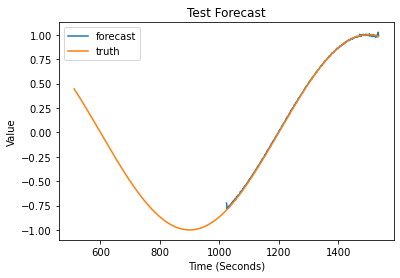

In [17]:
tester.forecast_plot(predictions, 1, 'vector_0')

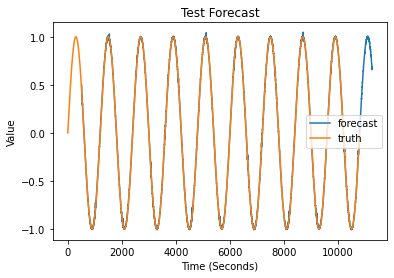

In [18]:
tester.forecast_plot(predictions, -1, 'vector_0')

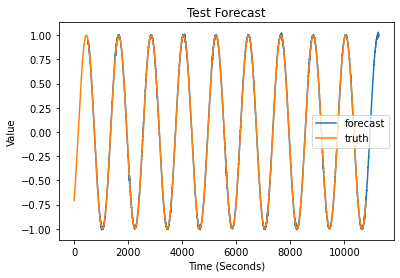

In [19]:
tester.forecast_plot(predictions, -1, 'vector_1')

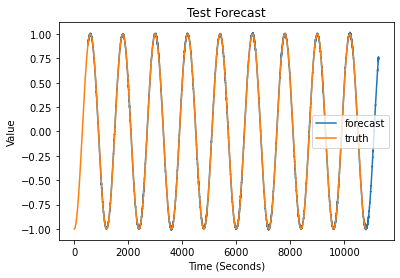

In [20]:
tester.forecast_plot(predictions, -1, 'vector_2')

In [22]:
tester.forecast_plot(predictions, -1, 'vector_2', return_data=True)

{'forecast': (array([  512,   513,   514, ..., 11261, 11262, 11263],
        dtype='timedelta64[s]'),
  array([0.8875789 , 0.8931578 , 0.91626376, ..., 0.7358366 , 0.76530135,
         0.73764324], dtype=float32)),
 'truth': (array([    0,     1,     2, ..., 10797, 10798, 10799],
        dtype='timedelta64[s]'),
  array([-1.        , -0.9999863 , -0.99994516, ..., -0.9998766 ,
         -0.99994516, -0.9999863 ], dtype=float32))}

©️ 2022 The Johns Hopkins University Applied Physics Laboratory LLC.